# 概要

* アタポンの1位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* イベント期間(h)を使って、ローカル線形トレンド + 時変係数モデルにしてみる

# インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

# イベントデータ読み込み

In [2]:
input_dir = './data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


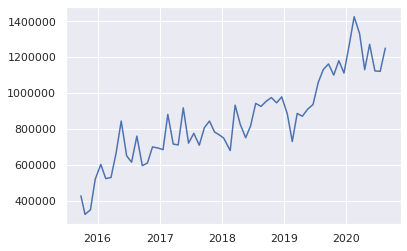

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

# stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f33c2889669abe2a05c72aa58f80b244 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmp3d2y6kx9\stanfit4anon_model_f33c2889669abe2a05c72aa58f80b244_1021780802082862286.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 24.5 s


In [8]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 58.6 s


In [10]:
# ファイル保存
save_dir = './data/'
with open(save_dir + 'c5_1_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c5_1_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


### 結果確認

In [11]:
# 読み込み
input_dir = './data/'
with open(input_dir + 'c5_1_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c5_1_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [12]:
fit

Inference for Stan model: anon_model_f33c2889669abe2a05c72aa58f80b244.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  2074.8   93.08 911.96 215.33 1456.4 2151.7 2736.4 3728.6     96   1.02
b_len[1]  2078.3   96.74 881.33 272.36 1462.9 2155.1 2725.8 3682.5     83   1.02
b_len[2]  2246.4   87.05 830.38 516.11 1672.9 2311.5 2837.9 3745.9     91   1.02
b_len[3]  2365.5   77.96 722.97 906.38 1866.6 2393.8 2878.9 3734.2     86   1.03
b_len[4]  2645.4   67.79 677.91 1291.6 2207.0 2657.9 3082.4 3960.8    100   1.03
b_len[5]  2609.5    75.1 696.47 1197.6 2153.6 2626.3 3080.3 3927.0     86   1.03
b_len[6]  2671.5   75.29 690.06 1268.2 2230.2 2680.7 3137.4 3989.5     84   1.04
b_len[7]  2904.3   70.39 645.13 1616.3 2482.1 2905.9 3316.0 4209.5     84   1.04
b_len[8]  3063.2    69.1 618.02 1847.7 2654.0 3037.3 3463.5 4351.3     80   1.04
b

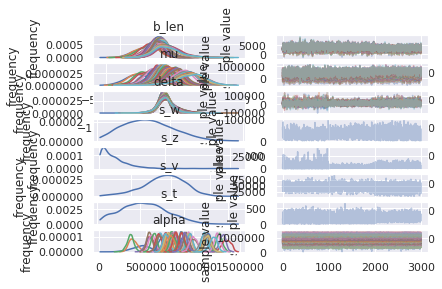

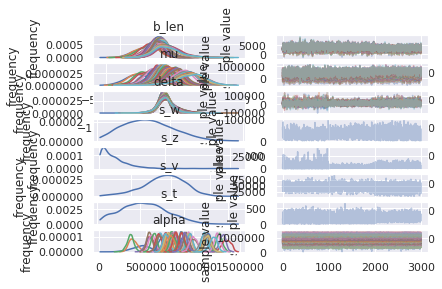

In [13]:
fit.plot()

In [14]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


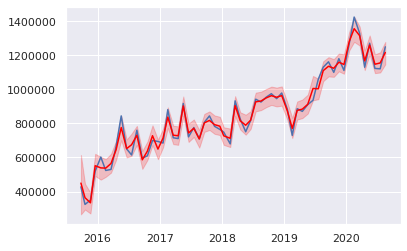

In [15]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

In [16]:
# 予測の正解率
# 90%区間に入ってる率
actual = df['1位'].tolist()
pred_low = alpha_5
pred_high = alpha_95

cnt_all = len(actual)
cnt_collect = ((pred_low < actual) & (actual < pred_high)).sum()
print('全数:', cnt_all)
print('正解数:', cnt_collect)
print('正解率:', cnt_collect / cnt_all) 

全数: 60
正解数: 60
正解率: 1.0


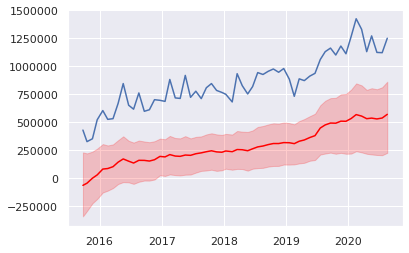

In [17]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

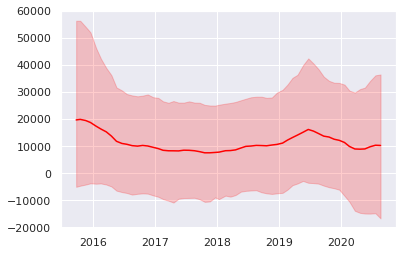

In [18]:
# delta
# トレンド成分の変化量
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, delta_mean, label='predicted trend', c='red')
plt.fill_between(X, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

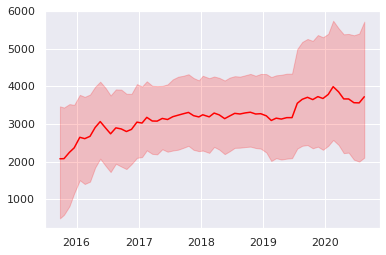

In [19]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_len_mean, c='red')
plt.fill_between(X, b_len_5, b_len_95, color='red', alpha=0.2)
plt.show()

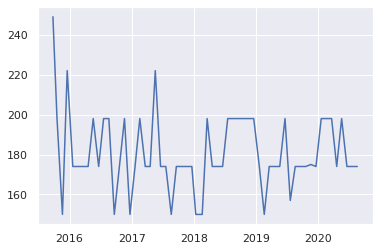

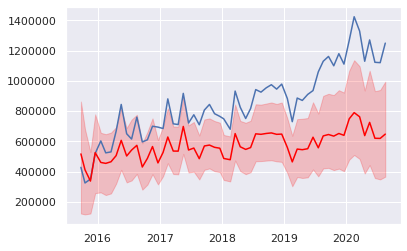

In [20]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['1位'], label='observed')
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

# 残差確認

In [21]:
df['predict'] = alpha_mean
# 予測とのズレ（比）
df['diff'] = df['1位'] - df['predict']
df.drop(['2001位', '形式', '属性'], axis=1, inplace=True)

In [22]:
df.head()

,イベント,1位,期間,predict,diff
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,249.0,449503.042381,-21726.042381
2015-10-19,Nation Blue,324369,198.0,363875.154510,-39506.154510
2015-11-20,Orange Sapphire,350000,150.0,333915.173163,16084.826837
2015-12-18,Snow Wings,520000,222.0,551688.592126,-31688.592126
2016-01-20,パステルピンクな恋,602529,174.0,538963.770200,63565.229800


In [23]:
# 残差の二乗の平均
"{:,}".format(((df['diff'])**2).sum() / len(df))

'907,841,145.9042832'

In [24]:
df.corr()

,1位,期間,predict,diff
1位,1.000000,0.100235,0.992209,0.275596
期間,0.100235,1.000000,0.108867,-0.045001
predict,0.992209,0.108867,1.000000,0.153691
diff,0.275596,-0.045001,0.153691,1.000000


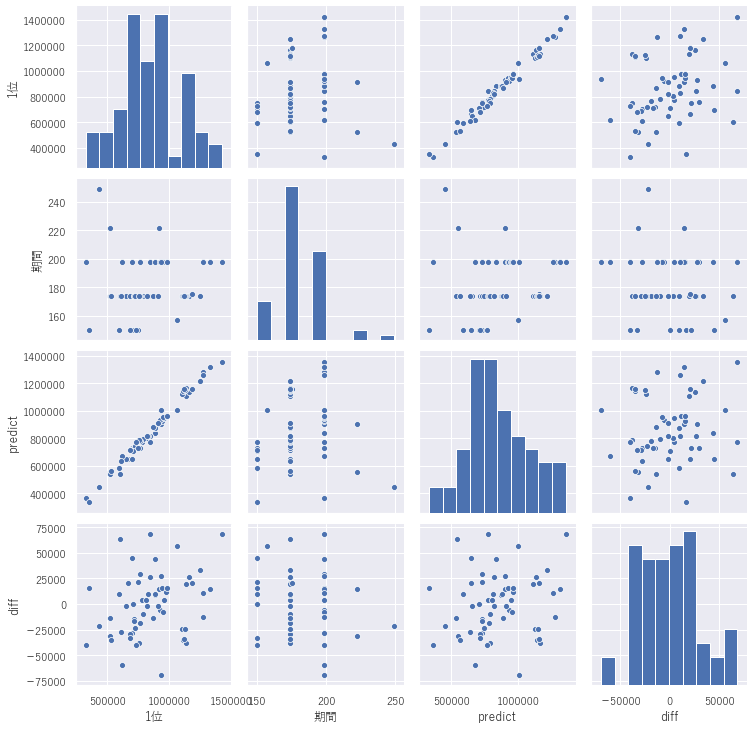

In [25]:
sns.set(font='Yu Gothic')
sns.pairplot(df)

* 結構、うまくフィットした
* トレンドは結構なめらかになり、係数が急にシフトする時がある
  * 「性能の高いキャラの追加」「グランドライブの実装」など、時間効率に影響する要因がコッチに乗ったと思われる

# 次のイベント予測

調子良さそうなので、↑のデータの次に開催された「オレンジタイム」の1位ポイントを予測してみる
* オレンジタイム
  * 開催日：2020/09/20
  * 期間：174h
  * １位ポイント（答え）：1,250,000

In [26]:
# 「オレンジタイム」の情報
pred_event_info = {
    '日付': datetime.date(2020, 9, 20),
    '期間': 174.0,
    '1位': 1250000,
}
pred_event_info

{'日付': datetime.date(2020, 9, 20), '期間': 174.0, '1位': 1250000}

## stanデータ準備

In [27]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
    'pred_term': 1,
    'pred_len' : [pred_event_info['期間']]
}

In [28]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
  int pred_term; // 予測期間の長さ
  vector[pred_term] pred_len; // 予測イベントのイベント期間(h)
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
generated quantities{
  vector[T + pred_term] delta_pred;
  vector[T + pred_term] mu_pred;
  vector[T + pred_term] b_len_pred;   // lenの係数
  vector[T + pred_term] alpha_pred;
  delta_pred[1:T] = delta;
  mu_pred[1:T] = mu;
  b_len_pred[1:T] = b_len;
  alpha_pred[1:T] = alpha;
  for(i in 1:pred_term){
    delta_pred[T+i] = normal_rng(delta_pred[T+i-1], s_z);
    mu_pred[T+i] = normal_rng(mu_pred[T+i-1]+delta[T+i-1], s_w);
    b_len_pred[T+i] = normal_rng(b_len_pred[T+i-1], s_t);
    alpha_pred[T+i] = mu_pred[T+i] + b_len_pred[T+i] * pred_len[i];
  }
}
"""

## Stan実行

In [29]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_321a73203f293d4a69c4a783b9abcfe9 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpdr0zpkdl\stanfit4anon_model_321a73203f293d4a69c4a783b9abcfe9_4344968332216080921.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 25.5 s


In [30]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [31]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 1min 1s


In [32]:
# ファイル保存
save_dir = './data/'
with open(save_dir + 'c5_2_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c5_2_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


## 結果確認

In [33]:
# 読み込み
input_dir = './data/'
with open(input_dir + 'c5_2_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c5_2_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [34]:
fit

Inference for Stan model: anon_model_321a73203f293d4a69c4a783b9abcfe9.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]       2077.0  106.76 930.71 190.87 1425.0 2152.7 2744.1 3741.0     76   1.04
b_len[1]       2070.2  109.67 897.66 247.96 1411.9 2104.0 2723.2 3709.7     67   1.04
b_len[2]       2239.4   89.41 843.52 492.98 1670.2 2280.2 2839.6 3776.8     89   1.03
b_len[3]       2371.4   59.47 737.97 908.48 1854.5 2379.2 2885.1 3773.1    154   1.02
b_len[4]       2653.4   42.35 686.87 1300.8 2192.7 2672.5 3118.8 3975.5    263   1.01
b_len[5]       2625.6   44.63 702.77 1243.1 2168.6 2655.8 3102.7 3971.4    248   1.01
b_len[6]       2684.7   41.77 696.47 1263.7 2207.7 2707.4 3157.0 4014.5    278   1.01
b_len[7]       2923.2   36.36 648.47 1642.0 2484.5 2925.0 3346.2 4212.5    318    1.0
b_len[8]       3077.6    38.8 624.47 

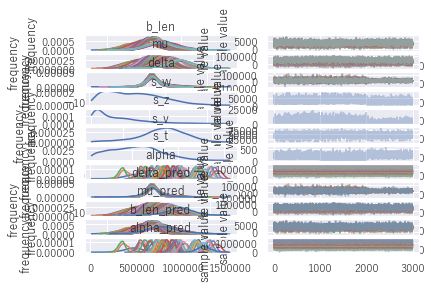

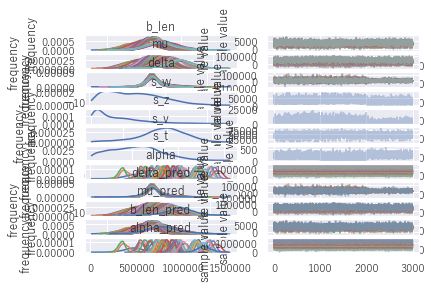

In [35]:
fit.plot()

### 予測結果確認

In [36]:
#x軸
X = df.index
X_pred = df.index.tolist()
X_pred.append(pred_event_info['日付'])

#結果を抽出
ms = fit.extract() 

# alpha
# 事後平均
alpha_mean = ms['alpha_pred'].mean(axis=0)
# #パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_25 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 25), axis=0))
alpha_75 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 75), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

#mu
# 事後平均
mu_mean = ms['mu_pred'].mean(axis=0)
#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len_pred'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

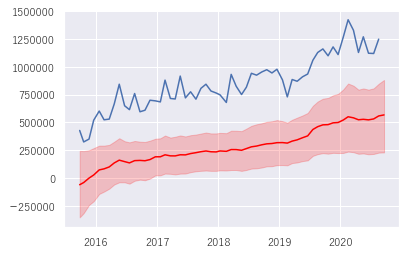

In [37]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, mu_mean, label='trend', c='red')
plt.fill_between(X_pred, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

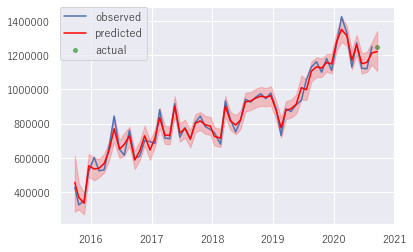

In [38]:
# alpha
# 90%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=15, label='actual')
plt.fill_between(X_pred, alpha_5, alpha_95, color='red', alpha=0.2)
plt.legend(loc='upper left', borderaxespad=0)
plt.show()

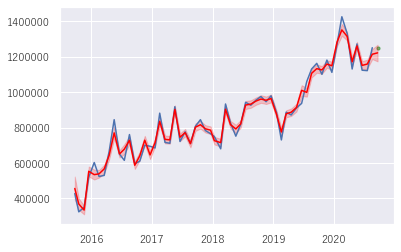

In [39]:
# alpha
# 50%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=10)
plt.fill_between(X_pred, alpha_25, alpha_75, color='red', alpha=0.2)
plt.show()

In [40]:
# 点推定
print('点推定:', alpha_mean[-1])
# 区間推定
print('区間推定(90%):', alpha_5[-1], '~', alpha_95[-1])
print('区間推定(50%):', alpha_25[-1], '~', alpha_75[-1])
# 実際の値
print('実測値', pred_event_info['1位'])

点推定: 1221084.7796474916
区間推定(90%): 1107229.505857218 ~ 1340410.7530706925
区間推定(50%): 1172885.420267253 ~ 1267087.2430767405
実測値 1250000


* 90%区間に入っている。結構良いのでは？
* 今回は50%区間にも入っている。